In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
asc = pd.read_csv(r'C:\Users\Alan\Documents\healthcare-bluebook-green-team\data\Medicare_Provider_Util_Payment_PUF_CY2017\Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017.tsv', 
                  sep='\t', 
                  header= 0,  
                  usecols=[0,6,9,10,13,15,16,17,21,22])

C:\Users\Alan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
asc.shape

(9847443, 10)

In [4]:
asc.dtypes

National Provider Identifier                                  int64
Entity Type of the Provider                                  object
City of the Provider                                         object
Zip Code of the Provider                                     object
Provider Type                                                object
Place of Service                                             object
HCPCS Code                                                   object
HCPCS Description                                            object
Number of Distinct Medicare Beneficiary/Per Day Services      int64
Average Medicare Allowed Amount                             float64
dtype: object

In [5]:
hospital = pd.read_csv(r'C:\Users\Alan\Documents\healthcare-bluebook-green-team\data\MUP_OHP_R19_P04_V10_D17_APC_Provider\Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.tsv', 
                         sep='\t',
                         header= 0,
                         usecols=[0,1,3,5,7,8,10,12])

In [6]:
hospital.shape

(61779, 8)

In [7]:
hospital.dtypes

Provider_ID                          int64
Provider_Name                       object
Provider_City                       object
Provider_Zip_Code                    int64
APC                                  int64
APC_Desc                            object
CAPC_Services                        int64
Average_Medicare_Allowed_Amount    float64
dtype: object

In [8]:
crosswalk = pd.read_excel(r'C:\Users\Alan\Documents\healthcare-bluebook-green-team\data\2020_january_web_addendum_b.12312019\2020_january_web_addendum_b.12312019.xlsx', 
                          skiprows=2,
                          dtype= {'APC ' : 'str'},
                          usecols=[0,1,2,3])

In [9]:
crosswalk.dtypes

HCPCS Code          object
Short Descriptor    object
SI                  object
APC                 object
dtype: object

In [10]:
crosswalk = crosswalk[crosswalk['APC '].notnull()]

In [11]:
crosswalk.head()

,HCPCS Code,Short Descriptor,SI,APC
273,10005,Fna bx w/us gdn 1st les,T,5071
275,10007,Fna bx w/fluor gdn 1st les,T,5071
277,10009,Fna bx w/ct gdn 1st les,T,5071
279,10011,Fna bx w/mr gdn 1st les,T,5071
281,10021,Fna bx w/o img gdn 1st les,T,5052


In [12]:
zip = pd.read_excel(r'C:\Users\Alan\Documents\healthcare-bluebook-green-team\data\ZIP_CBSA_032020.xlsx',
                    usecols=[0,1])

In [13]:
zip.shape

(47415, 2)

In [14]:
zip.CBSA.unique()

array([35620, 38660, 10380, 99999, 41980, 11640, 41900, 32420, 49500,
       27580, 17640, 17620, 25020, 42180, 44140, 49340, 38340, 14460,
       39300, 12700, 47240, 31700, 18180, 30100, 29060, 28300, 13620,
       38860, 30340, 12300, 12620, 12740, 13540, 40860, 15540, 25540,
       45860, 35300, 35980, 14860, 10900, 37980, 12100, 36140, 47220,
       45940, 39100, 10580, 11220, 24100, 26460, 24020, 36580, 28740,
       38460, 31660, 36300, 45060, 12180, 46540, 18660, 27060, 42900,
       48060, 40380, 13780, 15380, 12860, 36460, 27460, 18500, 21300,
       38300, 43740, 26860, 27780, 20180, 41260, 14620, 11020, 35260,
       49660, 36340, 32740, 47620, 21500, 26500, 44300, 30820, 42380,
       48700, 25420, 30380, 30140, 49620, 44980, 23900, 16540, 29540,
       39740, 42780, 14100, 30260, 42540, 39060, 20700, 20100, 41540,
       47900, 15680, 12580, 19060, 20660, 15700, 25180, 40060, 49020,
       25500, 44420, 16820, 31340, 47260, 40220, 19260, 32300, 13980,
       14140, 28700,

In [15]:
hospital.columns

Index(['Provider_ID', 'Provider_Name', 'Provider_City', 'Provider_Zip_Code',
       'APC', 'APC_Desc', 'CAPC_Services', 'Average_Medicare_Allowed_Amount'],
      dtype='object')

# nashville cbsa

In [16]:
#hos_city_1 = hos_city[hos_city['Provider City'].isin(city_list)]
#hos_city_1['Provider\nZip Code'].unique()

In [17]:
zip_list = [37207, 37232, 37129, 37205, 37208, 37236, 37203, 37087, 37075,
       37211]
nashville_cbsa = zip[zip['ZIP'].isin(zip_list)]
nashville_cbsa

,ZIP,CBSA
17066,37075,34980
17076,37087,34980
17102,37129,34980
17169,37203,34980
17171,37205,34980
17173,37207,34980
17174,37208,34980
17177,37211,34980
17193,37232,34980
17196,37236,34980


--In the first jupyter notebook:

data = 'string or data-table to pass'
%store data
del data


--In the second jupyter notebook:

%store -r data
data

# filtered non hospital dataset

In [18]:
#non_hospital_filtered = asc[asc['nppes_entity_code'] == 'O']
#non_hospital_filtered = non_hospital_filtered[non_hospital_filtered['provider_type'] == 'Ambulatory Surgical Center']
#non_hospital_filtered

created new column that trims the last 4 digits from 9 digit zip codes, then delted old zip code column

In [19]:
#non_hospital_filtered['ZIP']= non_hospital_filtered['nppes_provider_zip'].astype(str).str[:5]
#non_hospital_filtered
#del non_hospital_filtered['nppes_provider_zip']


In [20]:
crosswalk.dtypes

HCPCS Code          object
Short Descriptor    object
SI                  object
APC                 object
dtype: object

In [21]:
#non_hospital_filtered.dtypes

On every join i had to change the data types and column names for them to merge

In [22]:
#non_hospital_filtered.rename(columns= {'hcpcs_code' : 'HCPCS Code'}, inplace=True)

In [23]:
#non_hos_with_apc = pd.merge(non_hospital_filtered, crosswalk, on=('HCPCS Code'), how='inner')
#non_hos_with_apc

In [24]:

#non_hos_with_apc_with_cbsa = pd.merge(non_hos_with_apc, zip, on=('ZIP'), how='inner')


In [25]:
#non_hos_with_apc_with_cbsa

In [26]:
#hospital = hospital.rename(columns= {'Provider\nZip Code' :'ZIP'})
#Above is old code, doesn't match correct column name
hospital = hospital.rename(columns= {'Provider_Zip_Code' :'ZIP'})

In [27]:
hospital['ZIP'] = hospital['ZIP'].astype(str)
#hospital.head()

In [28]:
hospital['APC'] = hospital['APC'].astype(str)

In [29]:
hospital.dtypes

Provider_ID                          int64
Provider_Name                       object
Provider_City                       object
ZIP                                 object
APC                                 object
APC_Desc                            object
CAPC_Services                        int64
Average_Medicare_Allowed_Amount    float64
dtype: object

In [30]:
#Zip was a different type, converting to string before merging
zip['ZIP'] = zip['ZIP'].astype(str)

In [31]:
zip.dtypes

ZIP     object
CBSA     int64
dtype: object

In [32]:
hospital_with_cbsa = pd.merge(hospital, zip, on=('ZIP'), how='inner')
hospital_with_cbsa

,Provider_ID,Provider_Name,Provider_City,ZIP,APC,APC_Desc,CAPC_Services,Average_Medicare_Allowed_Amount,CBSA
0,10001,Southeast Alabama Medical Center,Dothan,36301,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,259,1038.45,20020
1,10001,Southeast Alabama Medical Center,Dothan,36301,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,53,1792.60,20020
2,10001,Southeast Alabama Medical Center,Dothan,36301,5091,Level 1 Breast/Lymphatic Surgery and Related P...,27,2113.58,20020
3,10001,Southeast Alabama Medical Center,Dothan,36301,5092,Level 2 Breast/Lymphatic Surgery and Related P...,23,3737.14,20020
4,10001,Southeast Alabama Medical Center,Dothan,36301,5112,Level 2 Musculoskeletal Procedures,17,1029.46,20020
...,...,...,...,...,...,...,...,...,...
70770,670122,Houston Methodist The Woodlands Hospital,The Woodlands,77385,5361,Level 1 Laparoscopy and Related Services,18,3866.82,26420
70771,670122,Houston Methodist The Woodlands Hospital,The Woodlands,77385,5373,Level 3 Urology and Related Services,11,1469.87,26420
70772,670122,Houston Methodist The Woodlands Hospital,The Woodlands,77385,5375,Level 5 Urology and Related Services,21,3356.89,26420
70773,670122,Houston Methodist The Woodlands Hospital,The Woodlands,77385,5431,Level 1 Nerve Procedures,12,1506.38,26420


Hospital Analysis

In [33]:
hospital_with_cbsa.loc[hospital_with_cbsa['Provider_City'] == 'Nashville', 'CBSA']
#Replace the City name to get the associated CBSA
#Nashville - 34980

17136    46660
17137    99999
57371    34980
57372    34980
57373    34980
         ...  
59050    34980
59051    34980
59052    34980
59053    34980
59054    34980
Name: CBSA, Length: 205, dtype: int64

In [34]:
nashville_cbsa = [34980]
nashville_hospital = hospital_with_cbsa[hospital_with_cbsa['CBSA'].isin(nashville_cbsa)]
nashville_hospital

,Provider_ID,Provider_Name,Provider_City,ZIP,APC,APC_Desc,CAPC_Services,Average_Medicare_Allowed_Amount,CBSA
57293,440073,Maury Regional Hospital,Columbia,38401,5491,Level 1 Intraocular Procedures,350,1660.34,34980
57295,440073,Maury Regional Hospital,Columbia,38401,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,278,1141.71,34980
57297,440073,Maury Regional Hospital,Columbia,38401,5073,Level 3 Excision/ Biopsy/ Incision and Drainage,51,2010.18,34980
57299,440073,Maury Regional Hospital,Columbia,38401,5091,Level 1 Breast/Lymphatic Surgery and Related P...,30,2338.09,34980
57301,440073,Maury Regional Hospital,Columbia,38401,5092,Level 2 Breast/Lymphatic Surgery and Related P...,40,4134.01,34980
...,...,...,...,...,...,...,...,...,...
59066,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5374,Level 4 Urology and Related Services,16,2378.34,34980
59067,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5375,Level 5 Urology and Related Services,44,3091.00,34980
59068,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5415,Level 5 Gynecologic Procedures,12,3341.62,34980
59069,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5463,Level 3 Neurostimulator and Related Procedures,17,16612.08,34980


In [35]:
#plt.hist(nashville_hospital['APC'])
n = 10
top_nash_apc = nashville_hospital['APC'].value_counts()[:n].index.tolist()
top_nash_apc
#Creates list of top 10 APCs in Nashville

['8011',
 '5114',
 '5113',
 '5361',
 '5072',
 '5375',
 '5302',
 '5191',
 '5373',
 '5341']

In [36]:
#plt.hist(nashville_hospital['APC'].isin(top_nash_apc))
nashville_hospital_freq_apc = nashville_hospital[nashville_hospital['APC'].isin(top_nash_apc)]
nashville_hospital_freq_apc

,Provider_ID,Provider_Name,Provider_City,ZIP,APC,APC_Desc,CAPC_Services,Average_Medicare_Allowed_Amount,CBSA
57295,440073,Maury Regional Hospital,Columbia,38401,5072,Level 2 Excision/ Biopsy/ Incision and Drainage,278,1141.71,34980
57305,440073,Maury Regional Hospital,Columbia,38401,5113,Level 3 Musculoskeletal Procedures,46,2280.84,34980
57307,440073,Maury Regional Hospital,Columbia,38401,5114,Level 4 Musculoskeletal Procedures,98,4770.50,34980
57319,440073,Maury Regional Hospital,Columbia,38401,5191,Level 1 Endovascular Procedures,170,2602.62,34980
57329,440073,Maury Regional Hospital,Columbia,38401,5302,Level 2 Upper GI Procedures,254,1229.64,34980
...,...,...,...,...,...,...,...,...,...
59063,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5302,Level 2 Upper GI Procedures,51,1170.59,34980
59064,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5361,Level 1 Laparoscopy and Related Services,40,3693.19,34980
59065,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5373,Level 3 Urology and Related Services,29,1411.63,34980
59067,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5375,Level 5 Urology and Related Services,44,3091.00,34980


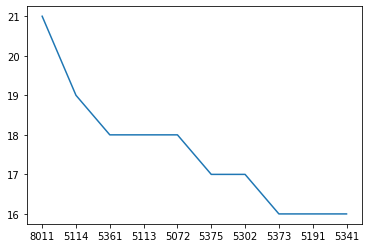

In [37]:
#plt.hist(nashville_hospital_top['APC'], 15)
plt.plot(nashville_hospital_freq_apc['APC'].value_counts())

In [38]:
nashville_hospital['APC_Desc'].value_counts()

Comprehensive Observation Services                         21
Level 4 Musculoskeletal Procedures                         19
Level 3 Musculoskeletal Procedures                         18
Level 2 Excision/ Biopsy/ Incision and Drainage            18
Level 1 Laparoscopy and Related Services                   18
Level 2 Upper GI Procedures                                17
Level 5 Urology and Related Services                       17
Level 4 Urology and Related Services                       16
Abdominal/Peritoneal/Biliary and Related Procedures        16
Level 2 Musculoskeletal Procedures                         16
Level 1 Endovascular Procedures                            16
Level 3 Urology and Related Services                       16
Level 3 Endovascular Procedures                            14
Level 3 Excision/ Biopsy/ Incision and Drainage            12
Level 4 Airway Endoscopy                                   11
Level 1 Breast/Lymphatic Surgery and Related Procedures    10
Level 5 

In [39]:
nashville_hospital_freq_apc['APC_Desc'].value_counts()

Comprehensive Observation Services                     21
Level 4 Musculoskeletal Procedures                     19
Level 2 Excision/ Biopsy/ Incision and Drainage        18
Level 1 Laparoscopy and Related Services               18
Level 3 Musculoskeletal Procedures                     18
Level 5 Urology and Related Services                   17
Level 2 Upper GI Procedures                            17
Level 1 Endovascular Procedures                        16
Abdominal/Peritoneal/Biliary and Related Procedures    16
Level 3 Urology and Related Services                   16
Name: APC_Desc, dtype: int64

In [40]:
nashville_hospital['APC'].unique

<bound method Series.unique of 57293    5491
57295    5072
57297    5073
57299    5091
57301    5092
         ... 
59066    5374
59067    5375
59068    5415
59069    5463
59070    8011
Name: APC, Length: 426, dtype: object>

In [41]:
np.corrcoef(nashville_hospital['CAPC_Services'], nashville_hospital['Average_Medicare_Allowed_Amount'])
#Looking for a correlation between count of APC services and Average Allowed Amount

array([[ 1.        , -0.08694031],
       [-0.08694031,  1.        ]])

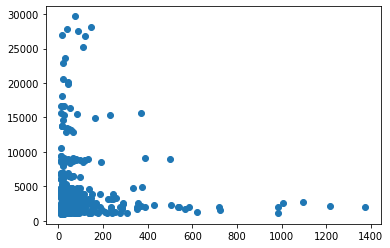

In [42]:
plt.scatter(nashville_hospital['CAPC_Services'], nashville_hospital['Average_Medicare_Allowed_Amount'])
plt.show()

#No clear correlation found in the data

In [64]:
#Grouping by Zip and Provider ID/Name, summing count of all services and averaging APC costs
providers = nashville_hospital.groupby(by=['ZIP', 'Provider_Name']).agg({'CAPC_Services':['sum'], 'Average_Medicare_Allowed_Amount':['mean']}).rename(columns=d)
providers

,,CAPC_Services,Average_Medicare_Allowed_Amount
,,Total_Services,Avg_APC_Cost
ZIP,Provider_Name,,
37055,Tristar Horizon Medical Center,1171,2746.486000
37066,Sumner Regional Medical Center,1039,2884.597647
37067,Williamson Medical Center,1982,4103.304815
37075,Tristar Hendersonville Medical Center,791,4823.768421
37076,Tristar Summit Medical Center,1356,4551.727619
37087,Tennova Healthcare-Lebanon,820,3032.969375
37110,Saint Thomas River Park Hospital,693,2481.465833
37129,Saint Thomas Rutherford Hospital,2785,4416.379200


In [65]:
d = {'sum':'Total_Services', 'mean':'Avg_APC_Cost'}
providers.columns = providers.columns.droplevel(0)
providers = providers.reset_index()
providers

,ZIP,Provider_Name,Total_Services,Avg_APC_Cost
0,37055,Tristar Horizon Medical Center,1171,2746.486000
1,37066,Sumner Regional Medical Center,1039,2884.597647
2,37067,Williamson Medical Center,1982,4103.304815
3,37075,Tristar Hendersonville Medical Center,791,4823.768421
4,37076,Tristar Summit Medical Center,1356,4551.727619
5,37087,Tennova Healthcare-Lebanon,820,3032.969375
6,37110,Saint Thomas River Park Hospital,693,2481.465833
7,37129,Saint Thomas Rutherford Hospital,2785,4416.379200
8,37160,Tennova Healthcare-Shelbyville,314,2254.673333
9,37166,Saint Thomas Dekalb Hospital,175,1638.795000


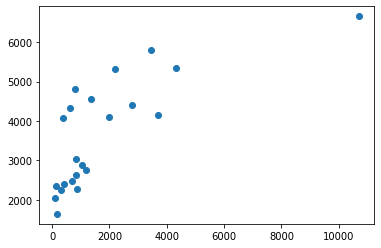

In [66]:
plt.scatter(providers['Total_Services'], providers['Avg_APC_Cost'])
plt.show()
#Yay - there's a trend!

In [67]:
providers.to_csv(r'C:\Users\Alan\Documents\healthcare-bluebook-green-team\data\providers.csv')
#Export the grouped providers for visualizations

In [69]:
hip_apc = ['5115']
nashville_hospital_hip = nashville_hospital[nashville_hospital['APC'].isin(hip_apc)]
nashville_hospital_hip
#Narrowing down to hip surgery APC

,Provider_ID,Provider_Name,Provider_City,ZIP,APC,APC_Desc,CAPC_Services,Average_Medicare_Allowed_Amount,CBSA
57309,440073,Maury Regional Hospital,Columbia,38401,5115,Level 5 Musculoskeletal Procedures,51,8634.91,34980
57487,440133,Saint Thomas Midtown Hospital,Nashville,37236,5115,Level 5 Musculoskeletal Procedures,19,8532.71,34980
57688,440029,Williamson Medical Center,Franklin,37067,5115,Level 5 Musculoskeletal Procedures,51,8356.84,34980
57818,440039,Vanderbilt University Medical Center,Nashville,37232,5115,Level 5 Musculoskeletal Procedures,56,8853.88,34980
58008,440053,Saint Thomas Rutherford Hospital,Murfreesboro,37129,5115,Level 5 Musculoskeletal Procedures,17,8933.64,34980
58211,440082,Saint Thomas West Hospital,Nashville,37205,5115,Level 5 Musculoskeletal Procedures,25,8628.93,34980
58464,440161,Tristar Centennial Medical Center,Nashville,37203,5115,Level 5 Musculoskeletal Procedures,43,8933.64,34980
58501,440218,Saint Thomas Hospital For Specialty Surgery,Nashville,37203,5115,Level 5 Musculoskeletal Procedures,13,6003.78,34980
58670,440150,Tristar Summit Medical Center,Hermitage,37076,5115,Level 5 Musculoskeletal Procedures,26,8640.65,34980
59060,440227,Tristar Stonecrest Medical Center,Smyrna,37167,5115,Level 5 Musculoskeletal Procedures,22,7940.19,34980


In [71]:
#Grouping by Zip and Provider ID/Name, summing count of all services and averaging APC costs
e = {'sum':'Count_Services', 'mean':'APC_Cost'}
providers_hip = nashville_hospital_hip.groupby(by=['ZIP', 'Provider_Name']).agg({'CAPC_Services':['sum'], 'Average_Medicare_Allowed_Amount':['mean']}).rename(columns=e)
providers_hip

CAPC_Services  \
                                                  Count_Services   
ZIP   Provider_Name                                                
37067 Williamson Medical Center                               51   
37076 Tristar Summit Medical Center                           26   
37129 Saint Thomas Rutherford Hospital                        17   
37167 Tristar Stonecrest Medical Center                       22   
37203 Saint Thomas Hospital For Specialty Surgery             13   
      Tristar Centennial Medical Center                       43   
37205 Saint Thomas West Hospital                              25   
37232 Vanderbilt University Medical Center                    56   
37236 Saint Thomas Midtown Hospital                           19   
38401 Maury Regional Hospital                                 51   

                                                  Average_Medicare_Allowed_Amount  
                                                                         APC_Cost  
ZIP   Provider_Name                                                                
37067 Williamson Medical Center                                           8356.84  
37076 Tristar Summit Medical Center                                       8640.65  
37129 Saint Thomas Rutherford Hospital                                    8933.64  
37167 Tristar Stonecrest Medical Center                                   7940.19  
37203 Saint Thomas Hospital For Specialty Surgery                         6003.78  
      Tristar Centennial Medical Center                                   8933.64  
37205 Saint Thomas West Hospital                                          8628.93  
37232 Vanderbilt University Medical Center                                8853.88  
37236 Saint Thomas Midtown Hospital                                       8532.71  
38401 Maury Regional Hospital                                             8634.91

In [72]:
providers_hip.columns = providers_hip.columns.droplevel(0)
providers_hip = providers_hip.reset_index()
providers_hip

,ZIP,Provider_Name,Count_Services,APC_Cost
0,37067,Williamson Medical Center,51,8356.84
1,37076,Tristar Summit Medical Center,26,8640.65
2,37129,Saint Thomas Rutherford Hospital,17,8933.64
3,37167,Tristar Stonecrest Medical Center,22,7940.19
4,37203,Saint Thomas Hospital For Specialty Surgery,13,6003.78
5,37203,Tristar Centennial Medical Center,43,8933.64
6,37205,Saint Thomas West Hospital,25,8628.93
7,37232,Vanderbilt University Medical Center,56,8853.88
8,37236,Saint Thomas Midtown Hospital,19,8532.71
9,38401,Maury Regional Hospital,51,8634.91


In [73]:
providers_hip.to_csv(r'C:\Users\Alan\Documents\healthcare-bluebook-green-team\data\providers_hip.csv')
#Export the grouped providers for visualizations

In [44]:
#%store  non_hospital_filtered

In [45]:
#%store  zip


In [46]:
#%store  crosswalk


In [47]:
#%store  hospital


In [48]:
#%store  non_hos_with_apc


In [49]:
#%store non_hos_with_apc_with_cbsa


In [50]:
#%store  hospital_with_cbsa
